In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle

from PattRecClasses import DiscreteD, GaussD, HMM, MarkovChain
from PattRecClasses.func import compute_pX, BaumWelch, HMM_prediction, load_data, plot_fft, plot_prediction_HMM

In [26]:
# Load train / test data
data_train = load_data('data/train.csv', averaging=True, window=2)
data_test = load_data('data/swrswr.csv', averaging=True, window=2)

In [55]:
# Define initial distributions
q = np.array( [1, 0, 0] )
A = np.array( [[0.9, 0.05, 0.05], [0.05, 0.9, 0.05], [0.05, 0.05, 0.9]] )
sub_dist_1 = GaussD( means=[0, 0, 0], cov=np.array([[0.8, 0.1, 0.1], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]]) )
sub_dist_2 = GaussD( means=[0, 0, 0], cov=np.array([[0.8, 0.1, 0.1], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]]) )
sub_dist_3 = GaussD( means=[0, 0, 0], cov=np.array([[0.8, 0.1, 0.1], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]]) )
distribution = [sub_dist_1, sub_dist_2, sub_dist_3]

In [56]:
# Train HMM
epochs = 20
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    q, A, distribution = BaumWelch(q, A, distribution, data_train)

Training:   0%|          | 0/20 [00:00<?, ?epoch/s]

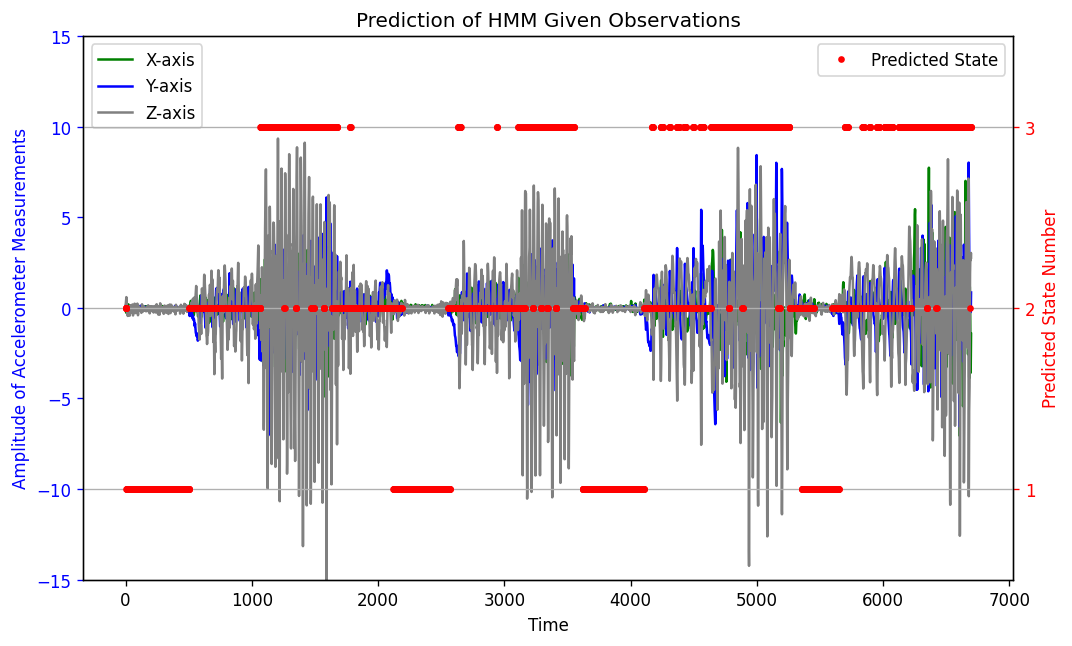

In [57]:
# Model performance on training data
state_train = HMM_prediction(q, A, distribution, data_train)
plot_prediction_HMM(state_train, data_train)

In [3]:
## Load pretrained HMM (optional)

with open('hmm_05_11.pkl', 'rb') as param:
    hmm = pickle.load(param)
q = hmm.stateGen.q
A = hmm.stateGen.A
distribution = hmm.outputDistr

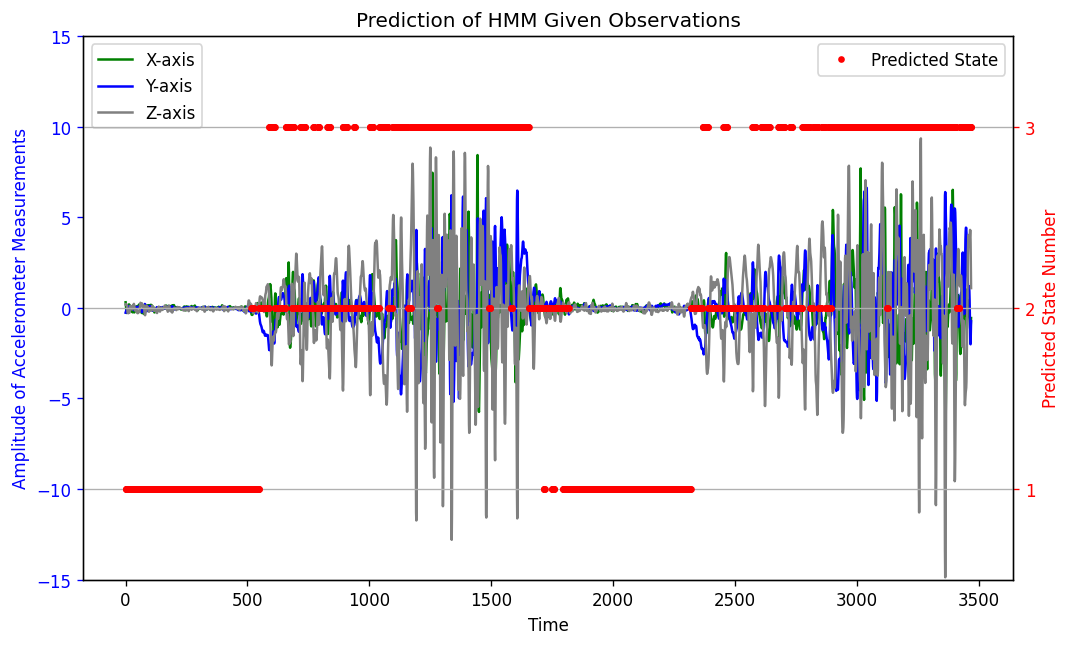

In [27]:
# Model performance on test data
state_test, pred_class = HMM_prediction(q, A, distribution, data_test, decision=True)
plot_prediction_HMM(state_test, data_test)

In [ ]:
## Save trained HMM parameters (optional)

# hmm = HMM(mc=MarkovChain(initial_prob=q, transition_prob=A), distributions=distribution)
# with open('hmm.pkl', 'wb') as param:
#     pickle.dump(hmm, param)

1
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


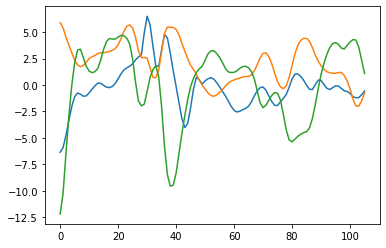

In [38]:
a = load_data('data/test/split_30.csv', averaging=True, window=2)
plt.plot(a[0])
plt.plot(a[1])
plt.plot(a[2])

state_seq, pred_class = HMM_prediction(q, A, distribution, a, decision=True)
print(pred_class)
print(state_seq)

3
[1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3]


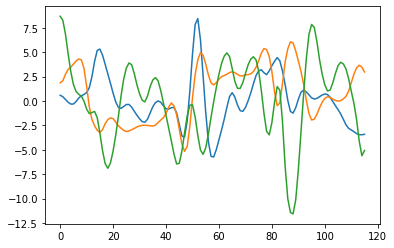

In [41]:
a = load_data('data/test/split_13.csv', averaging=True, window=2)
slc = data_train[:, 200:202]
c = np.concatenate((slc,a), axis=1)
plt.plot(a[0])
plt.plot(a[1])
plt.plot(a[2])

state_seq, pred_class = HMM_prediction(q, A, distribution, c, decision=True)
print(pred_class)
print(state_seq)

(3, 2)